In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
anime_selected = pd.read_csv('data/anime_selected.csv')

In [4]:
rating_selected = pd.read_csv('data/rating_selected.csv')

In [5]:
rating_stats = np.round(rating_selected[['rating']].describe(), 2)

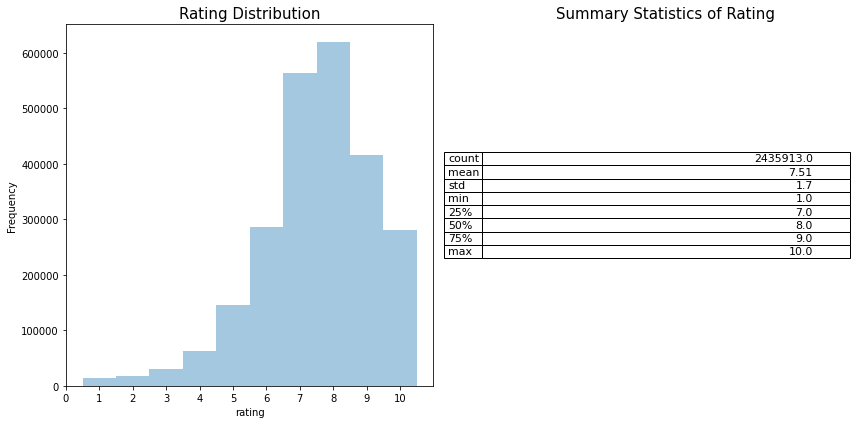

In [6]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
sns.distplot(rating_selected['rating'], hist = True, kde = False, 
             hist_kws = {'align': 'left'}, axlabel = 'rating', bins= list(range(1, 12)))
plt.ylabel('Frequency')
plt.title('Rating Distribution', fontsize = 15)
plt.xticks(range(11))

plt.subplot(1, 2, 2)
plt.table(cellText = rating_stats.values, rowLabels = rating_stats.index, loc = 'center').set_fontsize(11)
plt.title('Summary Statistics of Rating', fontsize = 15)
plt.axis('off')

plt.tight_layout()

#plt.savefig('research-images/rating_distribution.png', dpi = 600)

plt.show()

In [7]:
user_rating = rating_selected.groupby('user_id')['rating'].count()

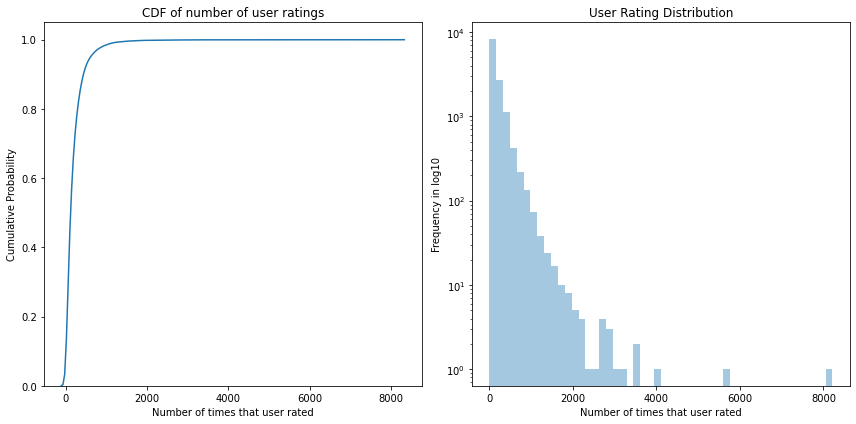

In [8]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
sns.distplot(user_rating, hist = False, kde_kws = {'cumulative': True}, axlabel = 'Number of times that user rated')
plt.title('CDF of number of user ratings', fontsize = 12)
plt.ylabel('Cumulative Probability')

plt.subplot(1, 2, 2)
sns.distplot(user_rating, hist = True, kde = False, hist_kws = {'log': True}, axlabel = 'Number of times that user rated')
plt.title('User Rating Distribution', fontsize = 12)
plt.ylabel('Frequency in log10')

plt.tight_layout()

#plt.savefig('research-images/user_rating_distribution.png', dpi = 600)

plt.show()

In [9]:
anime_rating = rating_selected.groupby('anime_id')['rating'].count()

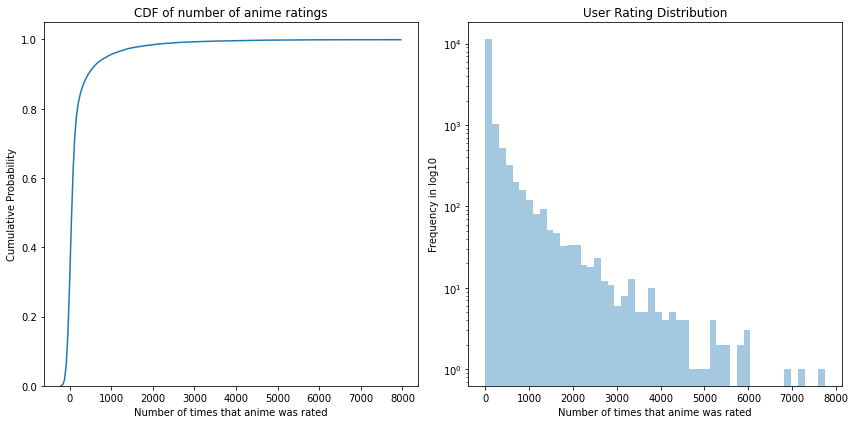

In [10]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
sns.distplot(anime_rating, hist = False, kde_kws = {'cumulative': True}, axlabel = 'Number of times that anime was rated')
plt.title('CDF of number of anime ratings', fontsize = 12)
plt.ylabel('Cumulative Probability')

plt.subplot(1, 2, 2)
sns.distplot(anime_rating, hist = True, kde = False, hist_kws = {'log': True}, axlabel = 'Number of times that anime was rated')
plt.title('User Rating Distribution', fontsize = 12)
plt.ylabel('Frequency in log10')

plt.tight_layout()

#plt.savefig('research-images/anime_rating_distribution.png', dpi = 600)

plt.show()

In [11]:
anime_rating_df = pd.DataFrame(anime_rating.sort_values(ascending = False)).reset_index().rename(columns = {'rating': 'count'})

In [12]:
anime_rating_df_named = anime_rating_df.merge(anime_selected[['anime_id', 'Name']], on = 'anime_id')

In [13]:
anime_freq_dict = dict(zip(anime_rating_df_named['Name'], anime_rating_df_named['count']))

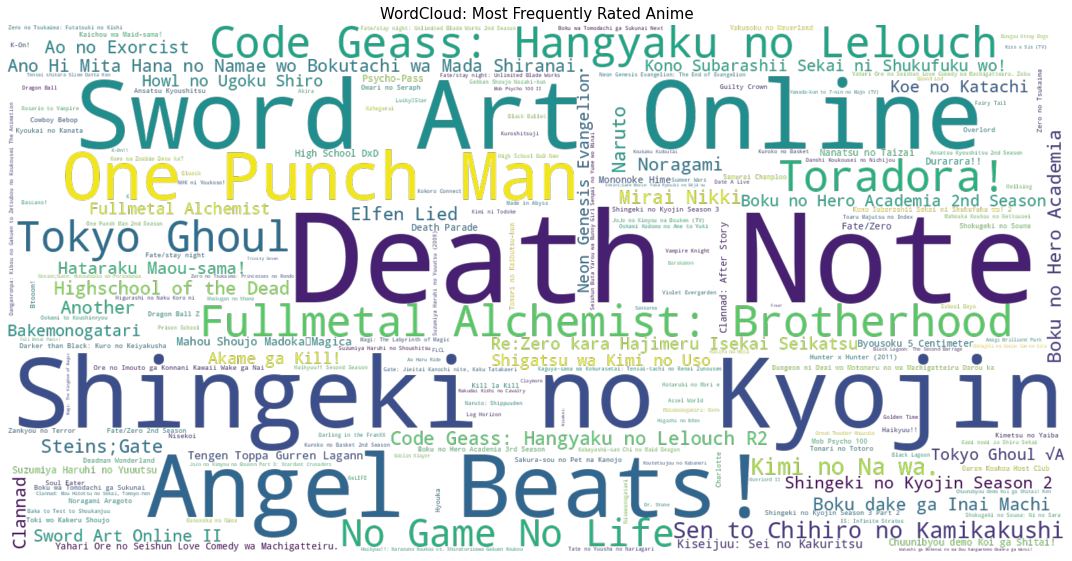

In [14]:
wordCloud = WordCloud(mode = 'RGBA', background_color = None, width = 1600, height = 800)

plt.figure(figsize = (15, 15))

word_cloud = wordCloud.generate_from_frequencies(anime_freq_dict)
plt.imshow(word_cloud, interpolation = "bilinear")
plt.title('WordCloud: Most Frequently Rated Anime', fontsize = 15)
plt.axis('off')

plt.tight_layout()

#plt.savefig('research-images/wordcloud_frequently_rated_anime.png', dpi = 600)

plt.show();

In [15]:
user_ids = rating_selected.groupby('user_id').filter(lambda x: x['rating'].nunique() == 1)['user_id'].unique()

In [16]:
rating_selected_slice = rating_selected[rating_selected['user_id'].isin(user_ids)].drop_duplicates('user_id')

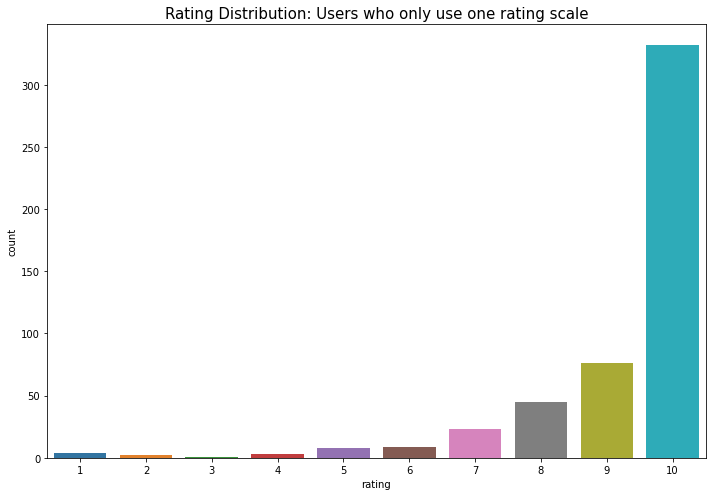

In [17]:
plt.figure(figsize = (10, 7))
sns.countplot(rating_selected_slice['rating'])
plt.title('Rating Distribution: Users who only use one rating scale', fontsize = 15)

plt.tight_layout()

#plt.savefig('research-images/users_single_rating_scale.png', dpi = 600)

plt.show();

In [18]:
anime_ids = rating_selected.groupby('anime_id').filter(lambda x: x['rating'].nunique() == 1)['anime_id'].unique()

In [19]:
rating_selected_slice_a = rating_selected[rating_selected['anime_id'].isin(anime_ids)].drop_duplicates('anime_id')

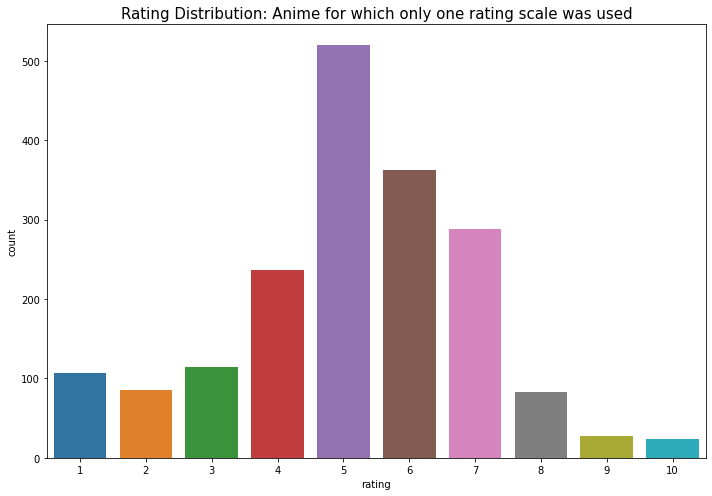

In [20]:
plt.figure(figsize = (10, 7))
sns.countplot(rating_selected_slice_a['rating'])
plt.title('Rating Distribution: Anime for which only one rating scale was used', fontsize = 15)

plt.tight_layout()

#plt.savefig('research-images/anime_single_rating_scale.png', dpi = 600)

plt.show();

In [21]:
anime_best = rating_selected[rating_selected['anime_id'].isin(anime_ids)]
anime_best = anime_best[anime_best['rating'] == 10]
anime_worst = rating_selected[rating_selected['anime_id'].isin(anime_ids)]
anime_worst = anime_worst[anime_worst['rating'] == 1]

In [22]:
anime_best_count = anime_best[['anime_id', 'rating']].groupby('anime_id').count().\
reset_index().rename(columns = {'rating': 'count'}).sort_values(by = 'count', ascending = False)\
.merge(anime_selected[['anime_id', 'Name']], on = 'anime_id')

In [23]:
anime_best_count_dict = dict(zip(anime_best_count['Name'], anime_best_count['count']))

In [24]:
anime_worst_count = anime_worst[['anime_id', 'rating']].groupby('anime_id').count().\
reset_index().rename(columns = {'rating': 'count'}).sort_values(by = 'count', ascending = False)\
.merge(anime_selected[['anime_id', 'Name']], on = 'anime_id')

In [25]:
anime_worst_count_dict = dict(zip(anime_worst_count['Name'], anime_worst_count['count']))

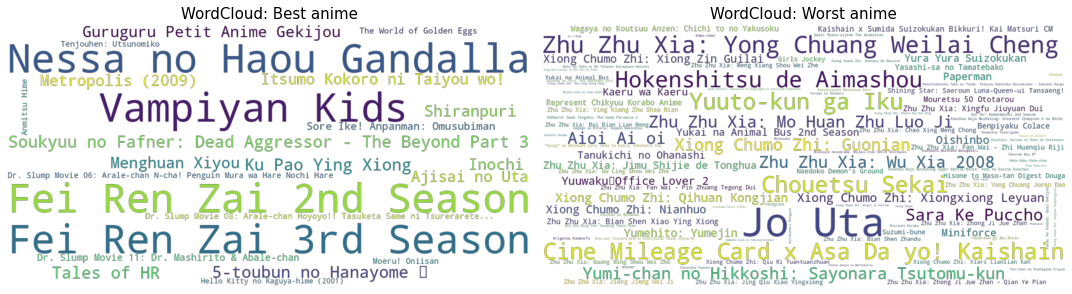

In [26]:
wordCloud = WordCloud(mode = 'RGBA', background_color = None, width = 1600, height = 800)

plt.figure(figsize = (15, 15))

plt.subplot(1, 2, 1)
word_cloud = wordCloud.generate_from_frequencies(anime_best_count_dict)
plt.imshow(word_cloud, interpolation = "bilinear")
plt.title('WordCloud: Best anime', fontsize = 15)
plt.axis('off')

plt.subplot(1, 2, 2)
word_cloud = wordCloud.generate_from_frequencies(anime_worst_count_dict)
plt.imshow(word_cloud, interpolation = "bilinear")
plt.title('WordCloud: Worst anime', fontsize = 15)
plt.axis('off')

plt.tight_layout()

#plt.savefig('research-images/wordcloud_worst_and_best_anime.png', dpi = 600)

plt.show();

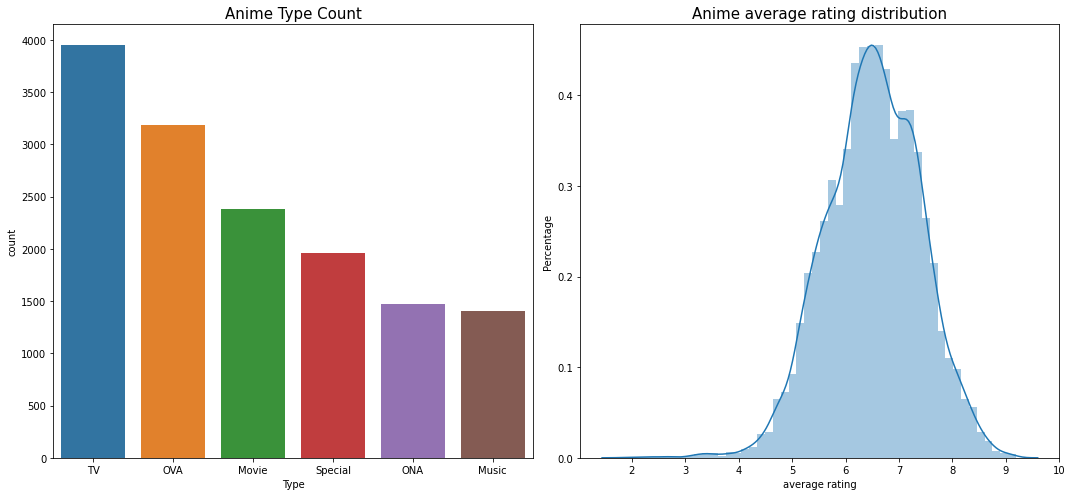

In [27]:
plt.figure(figsize = (15, 7))

plt.subplot(1, 2, 1)

sns.countplot(x = 'Type', data = anime_selected, order = list(anime_selected.Type.value_counts().index))
plt.title('Anime Type Count',fontsize=15)

plt.subplot(1, 2, 2)
sns.distplot(anime_selected[anime_selected['Score'] != 'Unknown']['Score'])
plt.title('Anime average rating distribution', fontsize = 15)
plt.xlabel('average rating')
plt.ylabel('Percentage')
plt.tight_layout()
#plt.savefig('research-images/anime_type_and_average_rating.png', dpi = 600)
plt.show();

In [28]:
genre_count = pd.DataFrame(anime_selected['Genres'].str.get_dummies(sep = ', ').sum().sort_values(ascending = False)).\
reset_index().rename(columns = {'index': 'genre', 0: 'count'})

In [29]:
genre_count_dict = dict(zip(genre_count['genre'], genre_count['count']))

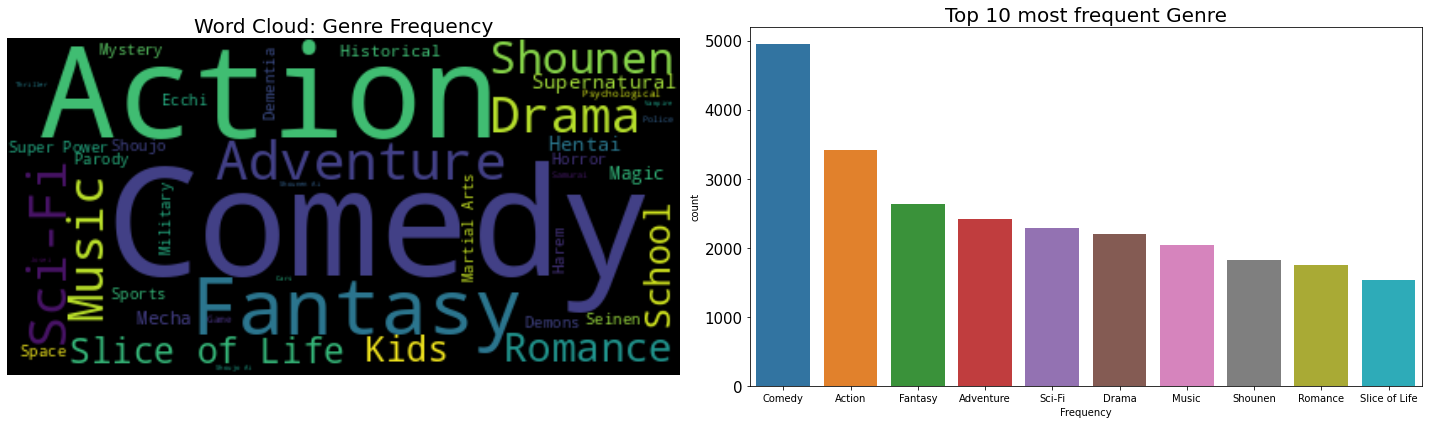

In [30]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies = genre_count_dict)

plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud, interpolation = "bilinear" )
plt.title('Word Cloud: Genre Frequency', fontsize = 20)
plt.axis('off')

plt.subplot(1, 2, 2)
sns.barplot(x = 'genre', y = 'count', data = genre_count.head(10), order = list(genre_count.head(10).genre))
plt.title('Top 10 most frequent Genre', fontsize = 20)
plt.xlabel('Frequency')
plt.yticks(fontsize = 15)

plt.tight_layout()
#plt.savefig('research-images/anime_genre_count.png', dpi = 600)

plt.show()